=== Sample index 4 ===
Prompt: Time-lapse microscopy video of HeLa cells in LT0002_24_J13, with siRNA knockdown of G6PC3. Fluorescently labeled chromosomes are observed. Phenotype: no.
Video path: /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0002_24/00229_01.mp4
Video shape: (96, 1024, 1344, 3) (frames, height, width, 3)


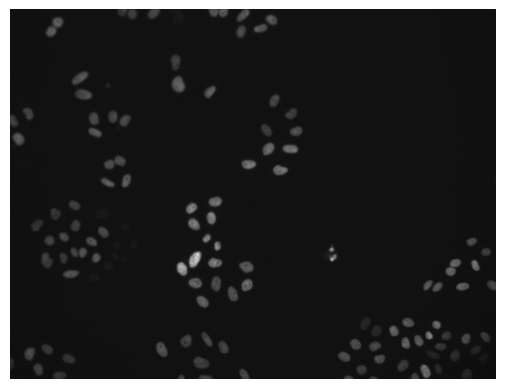

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

def load_prompts_and_videos(prompts_path="prompts.txt", videos_path="videos.txt"):
    """Reads prompts and video-file paths from text files."""
    with open(prompts_path, "r", encoding="utf-8") as f:
        prompts = [line.strip() for line in f]
    with open(videos_path, "r", encoding="utf-8") as f:
        videos = [line.strip() for line in f]
    assert len(prompts) == len(videos), "Mismatch in length of prompts and videos!"
    return prompts, videos

def load_video(video_path):
    """Loads all frames of a .mp4 video into a NumPy array of shape (num_frames, H, W, 3)."""
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Convert BGR -> RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
    cap.release()
    return np.array(frames)

def show_video(frames, fps=10):
    """Displays a NumPy (F,H,W,3) video inline with Matplotlib animation."""
    fig = plt.figure()
    im = plt.imshow(frames[0])
    plt.axis("off")

    def update(frame):
        im.set_array(frame)
        return [im]

    ani = animation.FuncAnimation(
        fig, update, frames=frames, interval=1000/fps, blit=True
    )
    return HTML(ani.to_jshtml())

def view_dataset_sample(index, prompts, videos, fps=10):
    """Load and visualize the sample at 'index' from the dataset, printing prompt and shape."""
    prompt = prompts[index]
    video_file = videos[index]
    print(f"=== Sample index {index} ===")
    print(f"Prompt: {prompt}")
    print(f"Video path: {video_file}")

    # We assume the video path is absolute or relative to current notebook location
    frames = load_video(video_file)
    print(f"Video shape: {frames.shape} (frames, height, width, 3)")

    display(show_video(frames, fps=fps))

# Example usage in a cell:
# 1. Load entire dataset
prompts, videos = load_prompts_and_videos("prompts.txt", "videos.txt")

# 2. Pick an index
idx = 4  # or any valid index < len(prompts)

# 3. Display
view_dataset_sample(idx, prompts, videos, fps=10)
